In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
jud= pd.read_csv('jud_geo_no_bus_ad_filter.csv')
#nonzeros.count() #  7270
#len(jud) #8737

#Out of all the cases 83% have nonzero judgments
#7270/8737 #0.8320933959024837

In [56]:
jud['file_date'].head(15)


0      8/11/2021
1     10/13/2021
2      10/8/2021
3     10/22/2021
4     10/28/2021
5     10/12/2021
6     10/12/2021
7     10/12/2021
8     10/12/2021
9     10/12/2021
10    10/12/2021
11     11/8/2021
12    10/13/2021
13    10/15/2021
14    10/18/2021
Name: file_date, dtype: object

In [27]:
i = jud['file_date'][0]
float(i.split('/')[0])

8.0

In [51]:
# Extract yr-mo
jud_yr_mo = []
jud_mo = []
for i in jud['file_date'].astype(str):
    if len(i.split('/')) > 2:
        if(float(i.split('/')[0]) > 9):
            jud_yr_mo.append(i.split('/')[2] + '/' + i.split('/')[0])
            jud_mo.append(i.split('/')[0])
        else:
            jud_yr_mo.append(i.split('/')[2] + '/0' + i.split('/')[0])
            jud_mo.append(i.split('/')[0])
    else:
        jud_yr_mo.append(i.split('/')[2])
        jud_mo.append('Na')

jud['yr_mo'] = jud_yr_mo
jud = jud[jud['yr_mo']!='0000/000']
jud = jud[jud['yr_mo']!='2000/03']
jud = jud[jud['yr_mo']!='2021/02']

In [52]:
np.unique(jud_yr_mo)

array(['2021/03', '2021/08', '2021/10', '2021/11', '2021/12', '2022/01',
       '2022/02', '2022/03', '2022/04', '2022/05', '2022/06', '2022/12',
       '2023/03'], dtype='<U7')

In [57]:
#just use a group by
non= jud[jud['judgment_amt']!=0.00].groupby('yr_mo')['judgment_amt'].count()
by_yr_mo=jud.groupby(['yr_mo'])['judgment_amt'].count()
pct_nonzero=pd.DataFrame((non/by_yr_mo) * 100)
pct_nonzero['yr_mo_col'] = pct_nonzero.index
pct_nonzero = pct_nonzero.sort_values('yr_mo_col')
pct_nonzero.yr_mo_col

yr_mo
2021/03    2021/03
2021/08    2021/08
2021/10    2021/10
2021/11    2021/11
2021/12    2021/12
2022/01    2022/01
2022/02    2022/02
2022/03    2022/03
2022/04    2022/04
2022/05    2022/05
2022/06    2022/06
2022/12    2022/12
2023/03    2023/03
Name: yr_mo_col, dtype: object

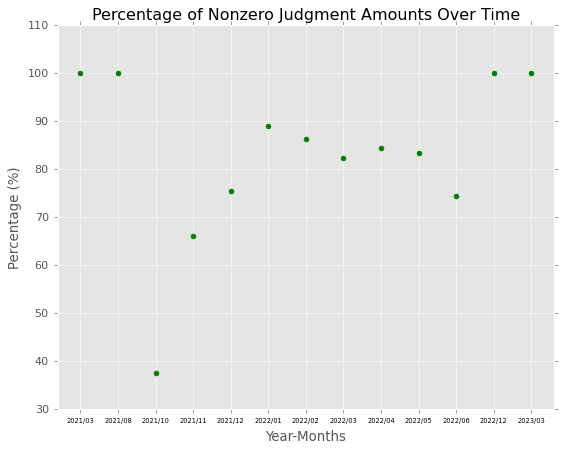

In [93]:
plt.style.use('ggplot')
plt.scatter(pct_nonzero['yr_mo_col'], pct_nonzero['judgment_amt'], color = 'green' )
plt.xticks(fontsize=6, color = 'black')
plt.xlabel('Year-Months')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Nonzero Judgment Amounts Over Time');

Text(0.5, 1.0, 'Percentage of Nonzero Judgment Amounts Over Time')

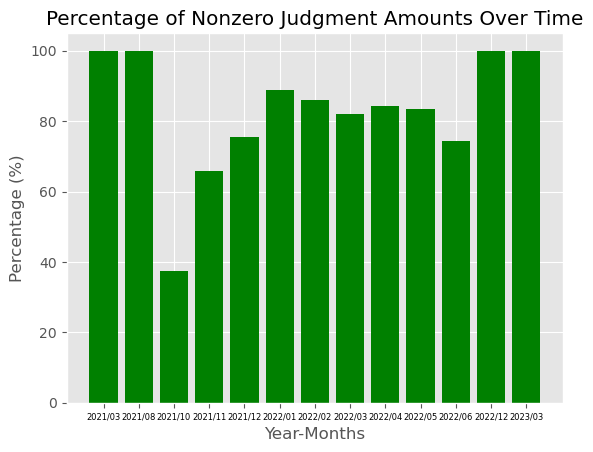

In [82]:
plt.style.use('ggplot')
plt.bar(pct_nonzero['yr_mo_col'], pct_nonzero['judgment_amt'], color = 'green' )
plt.xticks(fontsize=6, color = 'black')
plt.xlabel('Year-Months')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Nonzero Judgment Amounts Over Time');

In [ ]:
pct_nonzeronew = pct_nonzeronew.sort_values('yr_mo_col')
pct_nonzeronew

In [ ]:
pct_nonzeronew['yr_mo_col_num'] = pct_nonzeronew['yr_mo_col'].str.replace("/","").astype(float)
pct_nonzeronew

In [ ]:
plt.style.use('ggplot')
sns.regplot(data=pct_nonzeronew, x='yr_mo_col', y= 'judgment_amt', scatter = True).set(title='Percentage of Nonzero Judgments Over Time', 
                                           ylabel='Percentage', xlabel='Year-Month');